In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [3]:
df = pd.read_csv("FuelConsumption.csv")
df.head(6)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
5,2014,ACURA,RLX,MID-SIZE,3.5,6,AS6,Z,11.9,7.7,10.0,28,230


In [4]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(10)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267
9,2.4,4,9.2,212


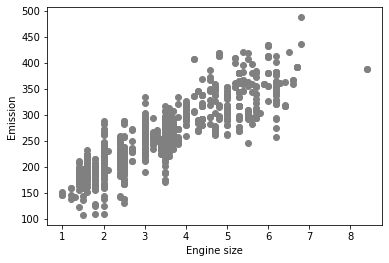

In [6]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='gray')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [7]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

In [8]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
print (train_x[:4])
poly = PolynomialFeatures(degree=3)
train_x_poly = poly.fit_transform(train_x)
train_x_poly

[[2.4]
 [1.5]
 [3.5]
 [3.5]]


array([[ 1.   ,  2.4  ,  5.76 , 13.824],
       [ 1.   ,  1.5  ,  2.25 ,  3.375],
       [ 1.   ,  3.5  , 12.25 , 42.875],
       ...,
       [ 1.   ,  3.2  , 10.24 , 32.768],
       [ 1.   ,  3.   ,  9.   , 27.   ],
       [ 1.   ,  3.2  , 10.24 , 32.768]])

In [9]:
clf = linear_model.LinearRegression()
train_y_ = clf.fit(train_x_poly, train_y)
print ('Coefficients: ', clf.coef_)
print ('Intercept: ',clf.intercept_)

Coefficients:  [[ 0.         31.52236681  3.98854019 -0.47368982]]
Intercept:  [125.83189832]


Text(0, 0.5, 'Emission')

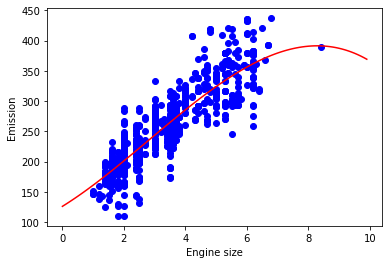

In [10]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = clf.intercept_[0]+ clf.coef_[0][1]*XX+ clf.coef_[0][2]*np.power(XX, 2)+clf.coef_[0][3]*np.power(XX, 3)
plt.plot(XX, yy, '-r' )
plt.xlabel("Engine size")
plt.ylabel("Emission")

In [11]:
from sklearn.metrics import r2_score

test_x_poly = poly.fit_transform(test_x)
test_y_ = clf.predict(test_x_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y,test_y_ ) )

Mean absolute error: 22.00
Residual sum of squares (MSE): 844.39
R2-score: 0.77
